In [58]:
import pandas as pd 
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns; 
import math
#TO BE CHANGED ON YOUR COMPUTERS
dataInfo = pd.read_csv('/Users/jowi/Desktop/uni/DataMining/DataMining-FinalProject/european-social-survey/variables.csv') #metadata
#TO BE CHANGED ON YOUR COMPUTERS
data = pd.read_csv('/Users/jowi/Desktop/uni/DataMining/DataMining-FinalProject/european-social-survey/ESS8e02.1_F1.csv') #data
#pd.set_option('display.max_colwidth', -1)
#print(data['Question']) <- see all the questions

DATA EXPLORATION

Data Normalization: 
Make sure the numerical columns wiht values in range 0-10 (numeric 2.0 type) are only in this range - get rid of values outside this range (66,77,99) by taking the mean.  

In [59]:

dataSliced = data[['idno','cntry','happy','atchctr','pplhlp','trstplt','stflife','imwbcnt','rlgdgr','lkredcc','lrscale']] # now data is just 6 columns
"""
dataSliced0 = dataSliced.where(dataSliced['lrscale'] < 11, 5) 
dataSliced1 = dataSliced0.where(dataSliced0['pplhlp'] < 11, 5) #no data larger than 5 - if larger scale then just put 5 
dataSliced2 = dataSliced1.where(dataSliced1['trstplt'] < 11, 5) # take mean instead of 5 (but how to calculate the mean before fetting rid of large valuse?)
dataSliced3 = dataSliced2.where(dataSliced2['stflife'] < 11, 5) 
dataSliced4 = dataSliced3.where(dataSliced3['imwbcnt'] < 11, 5)
dataSliced5 = dataSliced4.where(dataSliced4['rlgdgr'] < 11, 5) 
dataSliced6 = dataSliced5.where(dataSliced5['lkredcc'] < 11, 5)  # -> slow, is there a way to do it faster? Change into mean instead of 5
#happy 
dataSliced7 = dataSliced6.where(dataSliced6['happy'] < 11, 5) 
#attatchment to a country
dataSliced = dataSliced7.where(dataSliced7['atchctr'] < 11, 5) 

#Now all of those columns are 'clean' - meaning in range 0-10

print(dataSliced.head(50))
""""

SyntaxError: EOL while scanning string literal (<ipython-input-59-ed3b97ee4a79>, line 18)

In [ ]:
countries = dataSliced[['idno','cntry']].groupby('cntry')
#After this operation I get a dataframe wiht idno as a column name anc=d cntry as INDEX

In [27]:
peoplePerCountry = countries.count() #how many people from each country
print(peoplePerCountry)

       idno
cntry      
5      9343
AT     1693
BE     1666
CH     1327
CZ     1859
DE     2676
EE     1652
ES     1478
FI     1823
FR     1855
GB     1681
HU     1177
IE     2127
IL     1690
IS      796
IT     1576
LT     1199
NL     1505
NO     1457
PL     1135
PT     1074
RU     1174
SE     1408
SI     1016


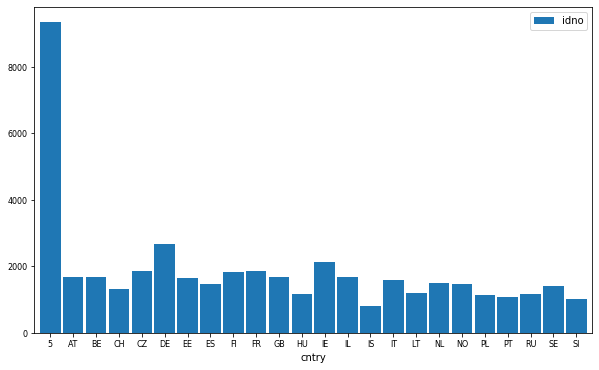

In [28]:
peoplePerCountry.plot.bar(rot=0, fontsize=8, width=0.9, figsize=(10,6))

In [29]:
# in total: 
peoplePerCountry['idno'].sum() #44387 people took participation in the survey

44387

In [30]:
# derive germany and poland:
dataPL = data[ data['cntry'] == 'PL']
dataGE = data[ data['cntry'] == 'DE']

In [31]:
#we choose our label to be column = that asks whether a person is defining themselves as right or left wing:
# column - lrscale - discrete values from 0 to 10 (ten meaning right) 
# only take into consideration 1 to 9 - the rest skew the data (10 Better place to live,77 Refusal,88 Don't know, 99 NA)
#OR  - take mean which should be around 5:

#data['happy'] = data['happy'].replace([77,88,99], 5, inplace=True) <- not working, dunno how to do it
#print(data[['happy','cntry']])
happiness = dataSliced[['happy','cntry']].groupby('cntry')
HappinessPerCountry = happiness.mean() 


In [32]:
print(HappinessPerCountry) #has anything besides values fro 0 -10 and if they do apply use mean

          happy
cntry          
5      5.000000
AT     7.591849
BE     7.755102
CH     8.220045
CZ     6.866057
DE     7.766069
EE     7.300847
ES     7.751691
FI     8.156336
FR     7.255526
GB     7.650803
HU     6.903993
IE     7.519511
IL     7.939053
IS     8.128141
IT     7.272843
LT     6.410342
NL     7.890365
NO     8.135209
PL     7.539207
PT     7.363128
RU     6.242760
SE     7.864347
SI     7.483268


In [33]:
# Polish are the happiest? dafuq?

In [34]:
attatchmentToCountry = dataSliced[['atchctr','cntry']].groupby('cntry')
print(attatchmentToCountry.mean())


        atchctr
cntry          
5      5.000000
AT     7.974011
BE     6.605042
CH     7.928410
CZ     7.875740
DE     7.508595
EE     7.813559
ES     7.664411
FI     8.420735
FR     8.113747
GB     7.076145
HU     8.400170
IE     7.761166
IL     8.150296
IS     8.228643
IT     8.024112
LT     7.888240
NL     7.192027
NO     8.343857
PL     8.527753
PT     8.438547
RU     7.293867
SE     7.966619
SI     7.305118


DATA CLEANING - TO BE DONE

PDA AND K-MEANS CLUSTERING

In [35]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.decomposition import PCA
from matplotlib import colors as mcolors 
import math 

In [36]:
df_country = data.loc[data['cntry'] == 'DE']
#group human values - not good clustering
df_sliced = df_country[['ipbhprp','iprspot','ipcrtiv','imprich' ]]# DECIDOUT ABOUT FEATURES - BOTH BETWEEN 0 AND 10 AND ON A SCALE
#print(df_sliced.head())

[2 1 0 ... 0 0 0]
          0         1         2
0  2.316974  1.074184 -1.469232
1  1.477354  0.519795 -0.064768
2 -0.379326 -1.420169  1.077044
3 -0.958985 -0.868882  0.589019
4  0.026461 -0.136552  0.736698


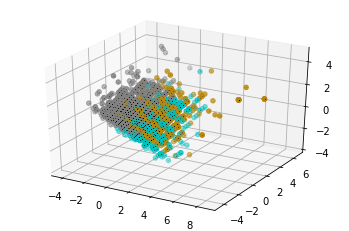

In [37]:
#KMEANS
clusters = 3
kmeans = KMeans(n_clusters = clusters) 
kmeans.fit(df_sliced) 
print(kmeans.labels_)

pca = PCA(3) 
pca.fit(df_sliced) 
  
pca_data = pd.DataFrame(pca.transform(df_sliced)) 
  
print(pca_data.head())



# Generate different colors 
colors = list(zip(*sorted(( 
                    tuple(mcolors.rgb_to_hsv( 
                          mcolors.to_rgba(color)[:3])), name) 
                     for name, color in dict( 
                            mcolors.BASE_COLORS, **mcolors.CSS4_COLORS 
                                                      ).items())))[1] 

skips = math.floor(len(colors[5 : -5])/clusters) 
cluster_colors = colors[5 : -5 : skips]

#####

fig = plt.figure() 
ax = fig.add_subplot(111, projection = '3d') 
ax.scatter(pca_data[0], pca_data[1], pca_data[2],  
           c = list(map(lambda label : cluster_colors[label], 
                                            kmeans.labels_))) 
   
str_labels = list(map(lambda label:'% s' % label, kmeans.labels_)) 
   
list(map(lambda data1, data2, data3, str_label: 
        ax.text(data1, data2, data3, s = str_label, size = 1, 
        zorder = 20, color = 'k'), pca_data[0], pca_data[1], 
        pca_data[2], str_labels)) 
   
plt.show()

#Nice but k-means plot is not very readable for now.


SUPERVIDED LEARNING - DECISION TREE
source: https://www.datacamp.com/community/tutorials/decision-tree-classification-python

Attribute selection measures - a heuristic for selecting the splitting criterion that partition data into the best possible manner.

In [60]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [61]:
"""
# group by groups to see which one is the best to create a decision tree (which one is the best indicator our label):
#List of columns for group 'Group Politics'
#THIS GROUP IS COUNTRY SPECIFIC - NOT APPLICABLE FOR THE WHOLE DATASET
dataPolitics = dataInfo.loc[dataInfo['Group']=='Group Politics']
namesListP = dataPolitics['Name'].tolist()
#print(namesListP)
namesListP.remove('lrscale')
#print(namesListP)

# List of columns for group 'Group Climate change' 
dataClimateChange = dataInfo.loc[dataInfo['Group']=='Group Climate change']
namesListC = dataClimateChange['Name'].tolist() 
#print(namesListC)

# List of columns for group 'Group Subjective well-being, social exclusion, religion, national and ethnic identity' 
dataWellBeing = dataInfo.loc[dataInfo['Group']=='Group Subjective well-being, social exclusion, religion, national and ethnic identity']
namesListW = dataWellBeing['Name'].tolist() 
#print(namesListW)

# List of columns for group 'Group Welfare attitudes' 
dataWelfare = dataInfo.loc[dataInfo['Group']=='Group Climate change']
namesListWelfare = dataWelfare['Name'].tolist() 
#print(namesListWelfare)

#list of columns that are not country specific:
dataGeneralQuestions = dataInfo.loc[dataInfo['Country_specific']=='no']
dataGeneralQuestionsList = dataGeneralQuestions['Name'].tolist()
#print(dataGeneralQuestionsList)
"""


"\n# group by groups to see which one is the best to create a decision tree (which one is the best indicator our label):\n#List of columns for group 'Group Politics'\n#THIS GROUP IS COUNTRY SPECIFIC - NOT APPLICABLE FOR THE WHOLE DATASET\ndataPolitics = dataInfo.loc[dataInfo['Group']=='Group Politics']\nnamesListP = dataPolitics['Name'].tolist()\n#print(namesListP)\nnamesListP.remove('lrscale')\n#print(namesListP)\n\n# List of columns for group 'Group Climate change' \ndataClimateChange = dataInfo.loc[dataInfo['Group']=='Group Climate change']\nnamesListC = dataClimateChange['Name'].tolist() \n#print(namesListC)\n\n# List of columns for group 'Group Subjective well-being, social exclusion, religion, national and ethnic identity' \ndataWellBeing = dataInfo.loc[dataInfo['Group']=='Group Subjective well-being, social exclusion, religion, national and ethnic identity']\nnamesListW = dataWellBeing['Name'].tolist() \n#print(namesListW)\n\n# List of columns for group 'Group Welfare attitudes'

Adding a lrscale3 to categorize people into three groups: left-wing, right-wing, and center (should be categorical string or number -(0(left),1(center),2)?)

In [62]:
dataSliced['lrscale3'] = dataSliced['lrscale']
#print(dataSliced.head(10))
for index,row in dataSliced.iterrows(): # 0 means very left and 10 means very right
    if row['lrscale'] < 5:
                    #row['lrscale3'] = 'left' 
                    dataSliced.at[index,'lrscale3'] = 0 
    elif row['lrscale'] > 6: 
                    #row['lrscale3'] = 'right'
                    dataSliced.at[index,'lrscale3'] = 1 
    else: 
                    #row['lrscale3'] = 'center' 
                    dataSliced.at[index,'lrscale3'] = 2
print(dataSliced.head(50)) 

                   
                    

KeyError: 'lrscale'

In [41]:
#split dataset in features and target variable
#for taking all the features from table - not working rn :
#I want to select all columns besides the target one - 'lrscale'
dataSliced = dataSliced.drop('lrscale', axis=1) # we don't that anymore - now we use lrscale3 (with only 3 possible values)
dataSliced = dataSliced.drop('idno', axis=1)
dataSliced = dataSliced.drop('cntry', axis=1)
data_no_label = dataSliced.drop('lrscale3', axis=1)

feature_cols = list(data_no_label.columns) # a list of ALL columns names, besides target lrscale)
print(feature_cols)

#Take features just from social trust group 
#feature_cols = ['nwspol','netusoft','netustm','ppltrst','pplfair','pplhlp']
#feature_cols = namesListC + namesListWelfare + namesListW 

#3rd approach - take only columns that are not country specific 
#feature_cols = dataGeneralQuestionsList
x = dataSliced[feature_cols]
y = dataSliced.lrscale3 # Target variable

print()

['happy', 'atchctr', 'pplhlp', 'trstplt', 'stflife', 'imwbcnt', 'rlgdgr', 'lkredcc']



In [42]:
""""
#Just for one country (PL) 
data_no_label = dataPL.drop('lrscale', axis=1)
#Take features just from social trust group 
#feature_cols = ['nwspol','netusoft','netustm','ppltrst','pplfair','pplhlp']
x = data[feature_cols]
y = data.lrscale # Target variable
"""

'"\n#Just for one country (PL) \ndata_no_label = dataPL.drop(\'lrscale\', axis=1)\n#Take features just from social trust group \n#feature_cols = [\'nwspol\',\'netusoft\',\'netustm\',\'ppltrst\',\'pplfair\',\'pplhlp\']\nx = data[feature_cols]\ny = data.lrscale # Target variable\n'

In [43]:
# splitting into training and test set: 
x_train, x_test, y_train,  y_test = train_test_split(x, y, test_size=0.1, random_state=1) # 90% training and 10% test

In [44]:
#BULDING A MODEL:
# Create Decision Tree classifer object
#CHANGE PARAMETERS HERE:
clf = DecisionTreeClassifier(max_depth=5) # by defaul't uses gini index for measuring the quality of the split

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train) #fit - Build a decision tree classifier from the training set (X, y).

#Predict the response for test dataset
#print(x_test)
y_pred = clf.predict(x_test)

In [45]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# = only 15% of correct predictions for the whole dataset without specified max_depth

#accuracy just with our 8 features - 50% 

#acuraccy with chosend features and max depth specified to 8 = 57.5 % 

# acuraccy with chosen 8 features and depth 4 = 56%  <- not enough levels, acuraccy drops 

# Next - specify more columns and then max depth or max sample and see if acuraccy improves.  

#fun fact - one, by accident I included lrsscale (old one) in a model and the acuraccy was 1 hihi. The same situation would occur if we had a variable that correlates to the label in 100% (is a 'perfect predictior')


Accuracy: 0.5764811894570849


Firstly I did not specify the depth of the tree so the nodes were expanded until all leafes were pure.
That was a big overfit and therefpre the acuraccy on the unseen instances was very low (15%). 

"Decision-tree learners can create over-complex trees that do not generalise the data well. This is called overfitting. Mechanisms such as pruning (not currently supported), setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem."
Over-fitting is the phenomenon in which the learning system tightly fits the given training data so much that it would be inaccurate in predicting the outcomes of the untrained data.
In decision trees, over-fitting occurs when the tree is designed so as to perfectly fit all samples in the training data set. Thus it ends up with branches with strict rules of sparse data. Thus this effects the accuracy when predicting samples that are not part of the training set.


TO change that either specify the depth of the tree (after specifying to depth 10 the acuraccy increased significantly ot 30% - but it is still a poor accuracy) 
Another ways - less dimensions (only chosen columns that make more sense - according to us the questions are very telling) 

PLOT a TREE

In [46]:
from sklearn import tree
#tree.plot_tree(clf) 

Predict Jowita's political view:

In [47]:
"""
#create a dataform with all the answers
#j_test = data[5, 5,600,8,8,7]
j_test = pd.read_csv('/Users/jowi/Desktop/uni/DataMining/DataMining-FinalProject/jowita.csv')
j_test_liberal = pd.read_csv('/Users/jowi/Desktop/uni/DataMining/DataMining-FinalProject/jowitaLiberal.csv')
j_test_not_Trusting = pd.read_csv('/Users/jowi/Desktop/uni/DataMining/DataMining-FinalProject/jowitaNotTrusting.csv')
jowita_pred = clf.predict(j_test)
jowita_pred_liberal = clf.predict(j_test_liberal)
jowita_pred_not_trusting = clf.predict(j_test_not_Trusting)
""" 
#predicting for 8 featues
j_test = pd.read_csv('/Users/jowi/Desktop/uni/DataMining/DataMining-FinalProject/jowita8features.csv')
jowita_pred = clf.predict(j_test) 



In [48]:
# Predictions 1 - for columns: 'happy','atchctr','pplhlp','trstplt','stflife','imwbcnt','rlgdgr','lkredcc' , to see them uncomment below :
#print(data_no_label) 
#To test it I create I answer those questions (my answer to lrscale3 is 0). I create a csv files with one row for that. Let's see what it will predict for me: 


In [49]:
"""
print(jowita_pred)
print(jowita_pred_liberal)
print(jowita_pred_not_trusting)
"""
#for 8 features: 
print(jowita_pred) # correct prediction

[0]


'\n#figure out how to draw a tree with this" \nimport graphviz \ndot_data = tree.export_graphviz(clf, out_file=None) \ngraph = graphviz.Source(dot_data) \ngraph.render("our tree") \n\ndot_data = tree.export_graphviz(clf, out_file=None, \n                    feature_names=iris.feature_names,  \n                    class_names=iris.target_names,  \n                    filled=True, rounded=True,  \n                    special_characters=True)  \ngraph = graphviz.Source(dot_data)  \n\ngraph \n'

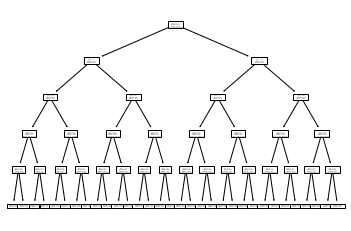

In [52]:
tree.plot_tree(clf) #<- tree is unreadable, even if only 5 levels
plt.rcParams['figure.figsize'] = 15,7
"""
#figure out how to draw a tree with this" 
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("our tree") 

dot_data = tree.export_graphviz(clf, out_file=None, 
                    feature_names=iris.feature_names,  
                    class_names=iris.target_names,  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = graphviz.Source(dot_data)  

graph 
"""